In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from PIL import Image

# 讀取CSV文件
df = pd.read_csv('/content/drive/MyDrive/archive/dogs.csv')

# 選擇指定類別
selected_breeds = [
    "Airedale", "Beagle", "Bloodhound", "Bluetick", "Chihuahua",
    "Collie", "Dingo", "French Bulldog", "German Sheperd",
    "Malinois", "Newfoundland", "Pekinese", "Pomeranian", "Pug", "Vizsla"
]

# 過濾指定的品種
df_selected = df[df['labels'].isin(selected_breeds)]

# 加載和預處理圖像
def load_images(df):
    image_list = []
    for idx, row in df.iterrows():
        img = Image.open('/content/drive/MyDrive/archive/' + row['filepaths'])
        img = img.resize((224, 224))  # 假設使用224x224大小的圖像
        img_array = np.array(img) / 255.0  # 圖像歸一化
        image_list.append(img_array)
    return np.array(image_list)

images = load_images(df_selected)

# 標籤編碼
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_selected['labels'])
labels = to_categorical(labels)  # 轉換為one-hot編碼

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# 建立CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(selected_breeds), activation='softmax')
])

# 編譯模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# 評估模型
val_loss, val_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {val_acc}")


Epoch 1/10
46/46 [==============================] - 12s 90ms/step - loss: 2.6883 - accuracy: 0.1332 - val_loss: 2.4686 - val_accuracy: 0.1296
Epoch 2/10
46/46 [==============================] - 3s 66ms/step - loss: 2.2950 - accuracy: 0.2160 - val_loss: 2.0614 - val_accuracy: 0.2901
Epoch 3/10
46/46 [==============================] - 3s 62ms/step - loss: 1.9236 - accuracy: 0.3692 - val_loss: 1.8039 - val_accuracy: 0.4136
Epoch 4/10
46/46 [==============================] - 3s 62ms/step - loss: 1.4627 - accuracy: 0.5328 - val_loss: 1.8625 - val_accuracy: 0.4012
Epoch 5/10
46/46 [==============================] - 3s 61ms/step - loss: 0.9319 - accuracy: 0.6922 - val_loss: 1.7969 - val_accuracy: 0.4136
Epoch 6/10
46/46 [==============================] - 3s 63ms/step - loss: 0.5886 - accuracy: 0.8102 - val_loss: 2.3385 - val_accuracy: 0.4444
Epoch 7/10
46/46 [==============================] - 3s 65ms/step - loss: 0.3568 - accuracy: 0.8992 - val_loss: 2.3335 - val_accuracy: 0.4259
Epoch 8/10
4

Capacity: 170
Weights: [41, 50, 49, 59, 55, 57, 60]
Profits: [442, 525, 511, 593, 546, 564, 617]
Hill Climbing Solution: [0 1 0 1 1 0 0]


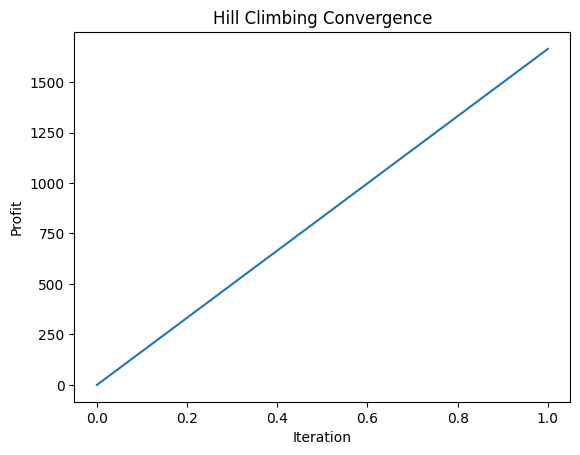

gen	nevals	max 
0  	300   	1735
1  	179   	1735
2  	173   	1735
3  	185   	1735
4  	172   	1735
5  	181   	1735
6  	173   	1735
7  	187   	1735
8  	184   	1735
9  	169   	1735
10 	174   	1735
11 	173   	1735
12 	179   	1735
13 	181   	1735
14 	197   	1735
15 	187   	1735
16 	182   	1735
17 	176   	1735
18 	188   	1735
19 	171   	1735
20 	189   	1735
21 	174   	1735
22 	180   	1735
23 	202   	1735
24 	161   	1735
25 	171   	1735
26 	173   	1735
27 	188   	1735
28 	178   	1735
29 	186   	1735
30 	176   	1735
31 	196   	1735
32 	190   	1735
33 	175   	1735
34 	174   	1735
35 	189   	1735
36 	187   	1735
37 	182   	1735
38 	174   	1735
39 	190   	1735
40 	167   	1735
41 	188   	1735
42 	200   	1735
43 	186   	1735
44 	197   	1735
45 	195   	1735
46 	181   	1735
47 	196   	1735
48 	180   	1735
49 	177   	1735
50 	163   	1735
51 	176   	1735
52 	190   	1735
53 	183   	1735
54 	171   	1735
55 	176   	1735
56 	190   	1735
57 	182   	1735
58 	172   	1735
59 	202   	1735
60 	171   	1735
61 	196 

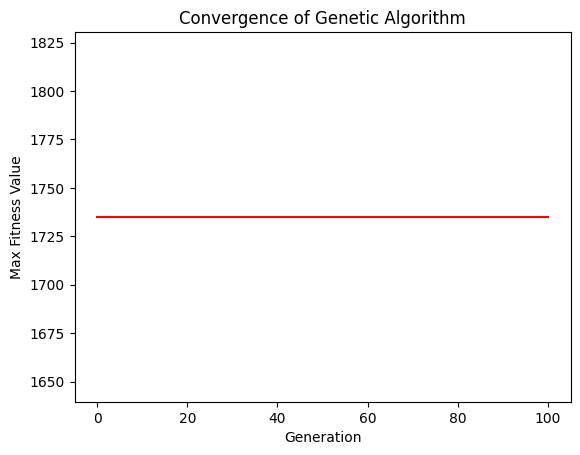

In [13]:
file_path = "/content/drive/MyDrive/archive/knapsack.txt"

with open(file_path, 'r') as file:
    lines = file.readlines()

capacity = int(lines[1].strip())

weights = list(map(int, lines[4:11]))
profits = list(map(int, lines[13:20]))

print("Capacity:", capacity)
print("Weights:", weights)
print("Profits:", profits)

import numpy as np
import matplotlib.pyplot as plt

def knapsack_value(solution, weights, profits, capacity):
    if np.dot(solution, weights) > capacity:
        return 0
    else:
        return np.dot(solution, profits)

def hill_climbing(weights, profits, capacity, iterations=100):
    solution = np.random.randint(2, size=len(weights))
    best_value = knapsack_value(solution, weights, profits, capacity)
    values = [best_value]

    for _ in range(iterations):
        candidate = solution.copy()
        change_index = np.random.randint(len(weights))
        candidate[change_index] = 1 - candidate[change_index]  # Toggle the state
        candidate_value = knapsack_value(candidate, weights, profits, capacity)

        if candidate_value > best_value:
            solution, best_value = candidate, candidate_value
            values.append(best_value)

    return solution, values

# 执行爬山算法
solution_hc, values_hc = hill_climbing(weights, profits, capacity)
print("Hill Climbing Solution:", solution_hc)

# 绘制收敛图
plt.plot(values_hc)
plt.xlabel('Iteration')
plt.ylabel('Profit')
plt.title('Hill Climbing Convergence')
plt.show()

from deap import base, creator, tools, algorithms

# 定义问题
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", np.random.randint, 2)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(weights))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_knapsack)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# 初始化种群
population = toolbox.population(n=300)

# 准备记录器
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)

# 算法执行
result, log = algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, verbose=True)

# 绘制收敛图
maxFitnessValues = log.select("max")
plt.plot(maxFitnessValues, color='red')
plt.xlabel('Generation')
plt.ylabel('Max Fitness Value')
plt.title('Convergence of Genetic Algorithm')
plt.show()
